In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import Pipeline

In [30]:
dataset = pd.read_csv('odi.csv')

In [3]:
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:,14].values #Label

In [4]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [5]:
dataset.shape

(350899, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [7]:
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [8]:
dataset.groupby('runs')

In [9]:
print(dataset.groupby('runs').groups) 

{0: Int64Index([     0,      1,    315,    622,   1572,   1573,   1893,   2201,
              2202,   2521,
            ...
            349152, 350073, 350074, 350075, 350076, 350077, 350078, 350079,
            350080, 350281],
           dtype='int64', length=3101), 1: Int64Index([   316,    317,    933,    934,    935,    936,    937,   1574,
              1575,   1576,
            ...
            349772, 349773, 349774, 349775, 350081, 350082, 350282, 350283,
            350284, 350285],
           dtype='int64', length=2488), 2: Int64Index([   938,    939,   1246,   1247,   1894,   1895,   1896,   1897,
              1898,   2204,
            ...
            350084, 350085, 350086, 350087, 350286, 350589, 350590, 350591,
            350592, 350593],
           dtype='int64', length=1924), 3: Int64Index([   940,    941,    942,    943,    944,    945,    946,   1578,
              1899,   1900,
            ...
            349782, 349783, 349784, 350594, 350595, 350596, 350597, 3505

In [10]:
result = dataset.groupby('bat_team').agg({'runs': ['mean']}) 
result

,runs
,mean
bat_team,
Afghanistan,103.719725
Asia XI,150.514989
Australia,122.956547
Bangladesh,105.383375
Bermuda,86.493213
Canada,94.619701
England,120.585727
Hong Kong,100.560976


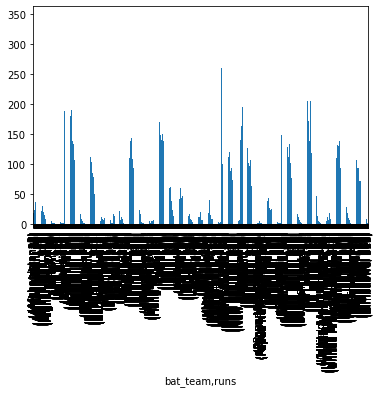

In [11]:
Groups = dataset.groupby(['bat_team','runs']).size()
Groups.plot.bar()

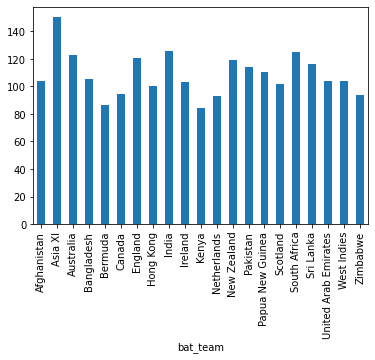

In [12]:
df = dataset.groupby(['bat_team'])['runs'].mean()
df.plot.bar()

In [13]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [14]:
cols = dataset.columns
num_cols = dataset._get_numeric_data().columns
num_cols

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [15]:
list(set(cols) - set(num_cols))

['bowler', 'bowl_team', 'venue', 'batsman', 'bat_team', 'date']

In [16]:
cat_dataset = dataset.select_dtypes(include=['object']).copy()

In [17]:
cat_dataset.head()

,date,venue,bat_team,bowl_team,batsman,bowler
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston


In [18]:
print(cat_dataset.isnull().values.sum())

0


In [19]:
print(cat_dataset.isnull().sum())

date         0
venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
dtype: int64


In [20]:
print(cat_dataset['date'].value_counts())

2007-02-04    1233
2008-06-24     930
2008-06-25     925
2017-01-22     907
2007-03-19     637
              ... 
2008-08-26     142
2007-03-31     139
2011-10-18     134
2014-01-01     128
2013-06-23     124
Name: date, Length: 1042, dtype: int64


In [21]:
print(cat_dataset['date'].value_counts().count())

1042


In [22]:
dataset.drop(['mid','date','venue'],axis=1, inplace=True)

In [23]:
cat_dataset_onehot_sklearn = cat_dataset.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['bowl_team'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,Afghanistan,Africa XI,Australia,Bangladesh,Bermuda,Canada,England,Hong Kong,India,Ireland,...,Netherlands,New Zealand,Pakistan,Papua New Guinea,Scotland,South Africa,Sri Lanka,United Arab Emirates,West Indies,Zimbabwe
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
cat_dataset_onehot_sklearn = cat_dataset.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['bat_team'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,Afghanistan,Asia XI,Australia,Bangladesh,Bermuda,Canada,England,Hong Kong,India,Ireland,...,Netherlands,New Zealand,Pakistan,Papua New Guinea,Scotland,South Africa,Sri Lanka,United Arab Emirates,West Indies,Zimbabwe
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cat_dataset_onehot_sklearn = cat_dataset.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['batsman'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,A Bagai,A Balbirnie,A Dananjaya,A Flintoff,A Kumble,A Martin,A Mishra,A Nehra,A Nel,A Shahzad,...,Younis Khan,Yuvraj Singh,Z Khan,ZE Surkari,Zafar Gohar,Zahoor Khan,Zakiullah Zaki,Ziaur Rahman,Zulfiqar Babar,Zulqarnain Haider
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cat_dataset_onehot_sklearn = cat_dataset.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['bowler'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,A Balbirnie,A Codrington,A Flintoff,A Kumble,A Martin,A Mishra,A Mithun,A Nao,A Nehra,A Nel,...,Younis Khan,Yuvraj Singh,Z Khan,Zaheer Maqsood,Zahid Hussain,Zahid Shah,Zahoor Khan,Zain Abbas,Ziaur Rahman,Zulfiqar Babar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

##Linear Regression

In [31]:
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:,14].values #Label

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 52.737657811129424
Custom accuracy: 43.354801937874036


In [42]:
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [322.42983935]


#RandomForestRegressor

In [37]:
X = dataset.iloc[:,[7,8,9,12,13]].values
y = dataset.iloc[:, 14].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [39]:
# Testing the dataset on trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 79.57097676499914
Custom accuracy: 77.16044457110289


In [40]:
# Testing with a custom input
import numpy as np
new_prediction = reg.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [314.95]


#Decision Tree

In [41]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
# Testing the dataset on trained model
y_pred = regressor.predict(X_test)
score = regressor.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 67.77708395619872
Custom accuracy: 78.67996580222285
